In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fraud = pd.read_csv("D:\\Assignment\\Assignment_14_Decision_Tree\\Fraud_check.csv")

In [3]:
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
fraud.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


# treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [5]:
fraud['Tax_con'] = fraud['Taxable.Income'].apply(lambda x: "Risky" if x <= 30000 else "Good")
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Tax_con
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


In [6]:
fraud.shape

(600, 7)

In [7]:
# EDA

In [8]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
 6   Tax_con          600 non-null    object
dtypes: int64(3), object(4)
memory usage: 32.9+ KB


In [9]:
fraud.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [10]:
# Lets check first unique value of categorical veriables

In [11]:
fraud["Undergrad"].unique()

array(['NO', 'YES'], dtype=object)

In [12]:
fraud['Marital.Status'].unique()

array(['Single', 'Divorced', 'Married'], dtype=object)

In [13]:
# Value counts

In [14]:
fraud["Undergrad"].value_counts()

YES    312
NO     288
Name: Undergrad, dtype: int64

In [15]:
fraud['Marital.Status'].value_counts()

Single      217
Married     194
Divorced    189
Name: Marital.Status, dtype: int64

In [16]:
fraud["Urban"].value_counts()

YES    302
NO     298
Name: Urban, dtype: int64

In [17]:
fraud["Tax_con"].value_counts()

Good     476
Risky    124
Name: Tax_con, dtype: int64

In [18]:
# Lets do label encoding  

In [19]:
from sklearn import preprocessing

In [20]:
le = preprocessing.LabelEncoder()
fraud['Undergrad'] = le.fit_transform(fraud['Undergrad'])

In [21]:
fraud['Marital.Status'] = le.fit_transform(fraud['Marital.Status'])

In [22]:
fraud["Urban"] = le.fit_transform(fraud["Urban"])

In [23]:
fraud["Tax_con"] = le.fit_transform(fraud["Tax_con"])

In [24]:
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Tax_con
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0


In [25]:
# normalization

In [26]:
def norm_func(i):
    x = (i - i.min())/(i.max()-i.min())
    return(x)

In [27]:
fraud_nor = norm_func(fraud.iloc[:, 0:])
fraud_nor

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Tax_con
0,0.0,1.0,0.656468,0.139472,0.333333,1.0,0.0
1,1.0,0.0,0.264428,0.622394,0.600000,1.0,0.0
2,0.0,0.5,0.300415,0.772568,1.000000,1.0,0.0
3,1.0,1.0,0.448436,0.962563,0.500000,1.0,0.0
4,0.0,0.5,0.792258,0.010081,0.933333,0.0,0.0
...,...,...,...,...,...,...,...
595,1.0,0.0,0.740236,0.078811,0.233333,1.0,0.0
596,1.0,0.0,0.669122,0.170058,0.066667,1.0,0.0
597,0.0,0.0,0.416566,0.737240,0.000000,1.0,0.0
598,1.0,0.5,0.988540,0.886810,0.566667,0.0,0.0


In [28]:
fraud_nor1 = fraud_nor.drop('Taxable.Income' , axis=1)
fraud_nor1

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Tax_con
0,0.0,1.0,0.139472,0.333333,1.0,0.0
1,1.0,0.0,0.622394,0.600000,1.0,0.0
2,0.0,0.5,0.772568,1.000000,1.0,0.0
3,1.0,1.0,0.962563,0.500000,1.0,0.0
4,0.0,0.5,0.010081,0.933333,0.0,0.0
...,...,...,...,...,...,...
595,1.0,0.0,0.078811,0.233333,1.0,0.0
596,1.0,0.0,0.170058,0.066667,1.0,0.0
597,0.0,0.0,0.737240,0.000000,1.0,0.0
598,1.0,0.5,0.886810,0.566667,0.0,0.0


In [29]:
# Split data in x and y
x = fraud_nor1.iloc[:,0:5]
y = fraud_nor1.Tax_con

In [30]:
x

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0.0,1.0,0.139472,0.333333,1.0
1,1.0,0.0,0.622394,0.600000,1.0
2,0.0,0.5,0.772568,1.000000,1.0
3,1.0,1.0,0.962563,0.500000,1.0
4,0.0,0.5,0.010081,0.933333,0.0
...,...,...,...,...,...
595,1.0,0.0,0.078811,0.233333,1.0
596,1.0,0.0,0.170058,0.066667,1.0
597,0.0,0.0,0.737240,0.000000,1.0
598,1.0,0.5,0.886810,0.566667,0.0


In [31]:
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
595    0.0
596    0.0
597    0.0
598    0.0
599    0.0
Name: Tax_con, Length: 600, dtype: float64

In [32]:
# Split data into training and testing data
from sklearn.model_selection import train_test_split

In [33]:
x_train,x_test,y_train,y_test = train_test_split(x,y , test_size =0.2 ,random_state =40)

In [34]:
x_train 

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
332,1.0,0.0,0.335364,0.033333,0.0
13,0.0,0.5,0.349830,0.533333,1.0
274,1.0,0.5,0.498882,0.833333,0.0
257,1.0,0.5,0.033517,0.566667,1.0
112,1.0,1.0,0.961264,0.866667,1.0
...,...,...,...,...,...
440,0.0,1.0,0.831200,0.433333,1.0
165,1.0,0.5,0.072897,0.766667,1.0
7,1.0,1.0,0.606176,0.100000,1.0
219,1.0,0.0,0.005948,0.300000,0.0


In [35]:
y_train

332    0.0
13     0.0
274    0.0
257    0.0
112    0.0
      ... 
440    0.0
165    0.0
7      0.0
219    1.0
326    1.0
Name: Tax_con, Length: 480, dtype: float64

# Building Decision Tree Classifier using Entropy Criteria

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
model = DecisionTreeClassifier(criterion = 'entropy' ,max_depth =3)
model.fit(x_train ,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

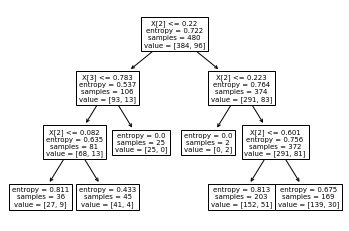

In [38]:
from sklearn import tree
tree.plot_tree(model);

In [39]:
fraud.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban', 'Tax_con'],
      dtype='object')

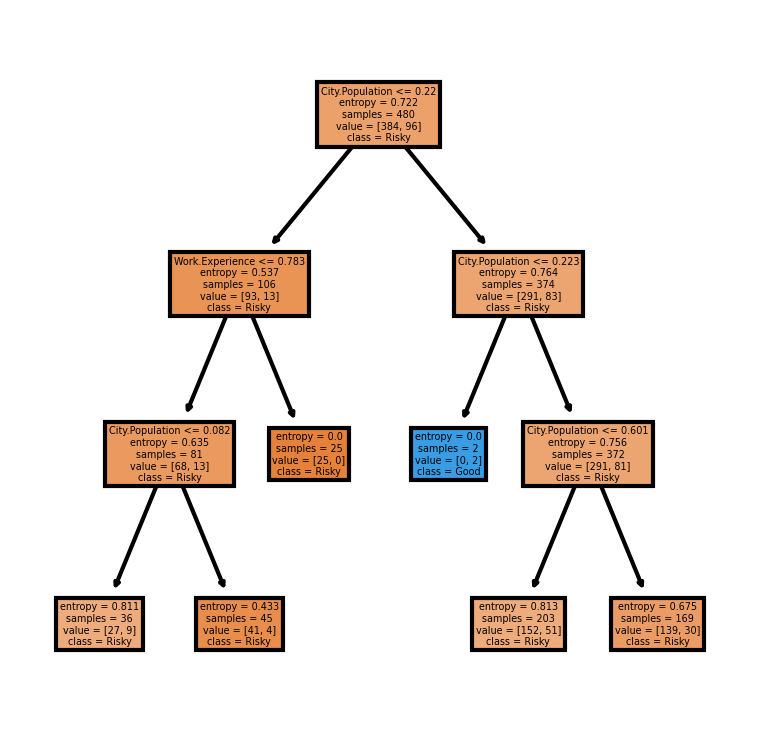

In [40]:
fn =['Undergrad', 'Marital.Status','City.Population','Work.Experience', 'Urban'] # fn =features name
cn = ['Risky','Good'] # class name
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (3,3), dpi = 300)
tree.plot_tree(model , feature_names = fn , class_names = cn ,filled = True);


In [41]:
# model testing

In [42]:
pred = model.predict(x_test)

In [43]:
pred 

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])

In [44]:
pd.Series(pred).value_counts()

0.0    120
dtype: int64

In [45]:
# accuracy
np.mean(pred==y_test)

0.7666666666666667

# Building Decision Tree Classifier using Gini Impurity

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
model_gini = DecisionTreeClassifier(criterion ='gini' ,max_depth = 3)
model_gini.fit(x_train ,y_train)

DecisionTreeClassifier(max_depth=3)

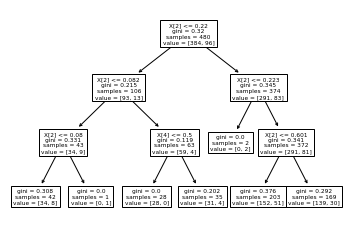

In [48]:
from sklearn import tree
tree.plot_tree(model_gini);

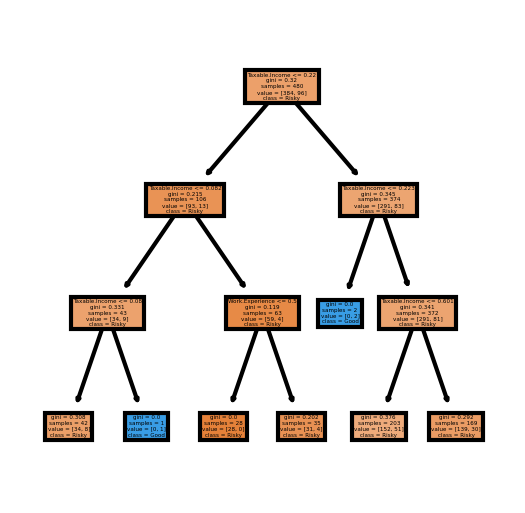

In [49]:
fn =['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population','Work.Experience', 'Urban'] # fn =features name
cn = ['Risky','Good'] # class name
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (2,2), dpi = 300)
tree.plot_tree(model_gini , feature_names = fn , class_names = cn ,filled = True);

In [50]:
pred1 = model_gini.predict(x_test)

In [51]:
pred1

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])

In [52]:
pd.Series(pred1).value_counts()

0.0    119
1.0      1
dtype: int64

In [53]:
# accuracy
np.mean(pred1==y_test)

0.7583333333333333